In [1]:
import numpy as np 
import os 
import cv2 
import matplotlib.pyplot as plt 

In [2]:

def Canny_detector(img, weak_th=None, strong_th=None):
    """
    Applies Canny edge detection to the input image.

    Args:
    - img: Input image.
    - weak_th: Weak threshold for double thresholding step.
    - strong_th: Strong threshold for double thresholding step.

    Returns:
    - mag: Magnitude of gradients of edges.
    """
    # Conversion of image to grayscale
    if len(img.shape) == 3:  # Ensure input image is grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Noise reduction step
    img = cv2.GaussianBlur(img, (5, 5), 1.4)

    # Calculating the gradients
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)

    # Conversion of Cartesian coordinates to polar
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees=True)

    # Setting default thresholds if not provided
    mag_max = np.max(mag)
    if weak_th is None:
        weak_th = mag_max * 0.1
    if strong_th is None:
        strong_th = mag_max * 0.5

    # Double thresholding step
    weak_ids = mag < weak_th
    strong_ids = mag > strong_th
    ids = np.zeros_like(img)
    ids[strong_ids] = 2  # Strong edges
    ids[np.logical_and(mag <= strong_th, mag >= weak_th)] = 2  # Weak edges

    # Non-maximum suppression step
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            if ids[i, j] == 2:  # Weak edge
                if np.any(ids[i - 1:i + 2, j - 1:j + 2] == 2):
                    ids[i, j] = 2

    return ids


In [3]:
frame = cv2.imread('02_02.JPG') 

# calling the designed function for 
# finding edges 
canny_img = Canny_detector(frame) 


<Figure size 640x480 with 0 Axes>

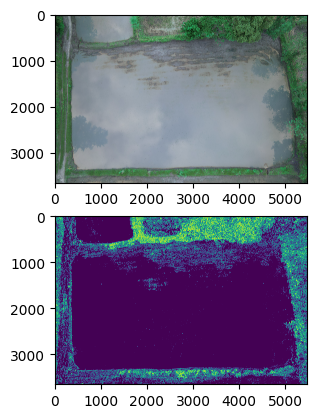

In [4]:
# Displaying the input and output image 
plt.figure() 
f, plots = plt.subplots(2, 1) 
plots[0].imshow(frame) 
plots[1].imshow(canny_img) 
